# Overview

Imagen on Vertex AI (image Generative AI) offers a variety of features:

* Image generation
* Image editing
* Visual captioning
* Visual question answering

This notebook focuses on **visual captioning** only.

Visual captioning with Imagen on Vertex AI can generate text descriptions of images. The model takes in an image as input and produces one or more text descriptions of the image as output. The generated text descriptions can be used for a variety of use cases:

* getting detailed metadata about images for storing and searching
* generating automated captioning to support accessibility use cases
* producing descriptions of products and visual assets

More information about Visual captioning with Imagen on Vertex AI can be found in the official documentation.

Objectives
In this notebook, you will learn how to use the Vertex AI Python SDK to:

* Generate image captions using the Imagen's visual captioning features
* Experiment with different parameters, such as:
  * number of captions to be generated
  * language of the generated captions
  * type and version of model that is used to generate the captions

**Costs**
* This notebook uses billable components of Google Cloud:
  * Vertex AI (Imagen)
* Learn about Vertex AI pricing and use the Pricing Calculator to generate a cost estimate based on your projected usage.

In [ ]:
%pip install --upgrade --user google-cloud-aiplatform

In [1]:
# Restart kernel after installs so that your environment can access the new packages
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

# Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, you will need to authenticate your environment. To do this, run the new cell below. This step is not required if you are using Vertex AI Workbench.

In [2]:
import sys

# Additional authentication is required for Google Colab
if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user()

In [3]:
# Define project information
from google.colab import userdata
PROJECT_ID = userdata.get('VERTEX_AI_PROJECT_ID')
LOCATION = "us-central1"  # @param {type:"string"}

# Initialize Vertex AI
import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

## Load the image captioning model

The model names from Vertex AI Imagen have two components: model name and version number. The naming convention follow this format: <model-name>@<version-number>. For example, imagetext@001 represent the version 001 of the imagetext model.

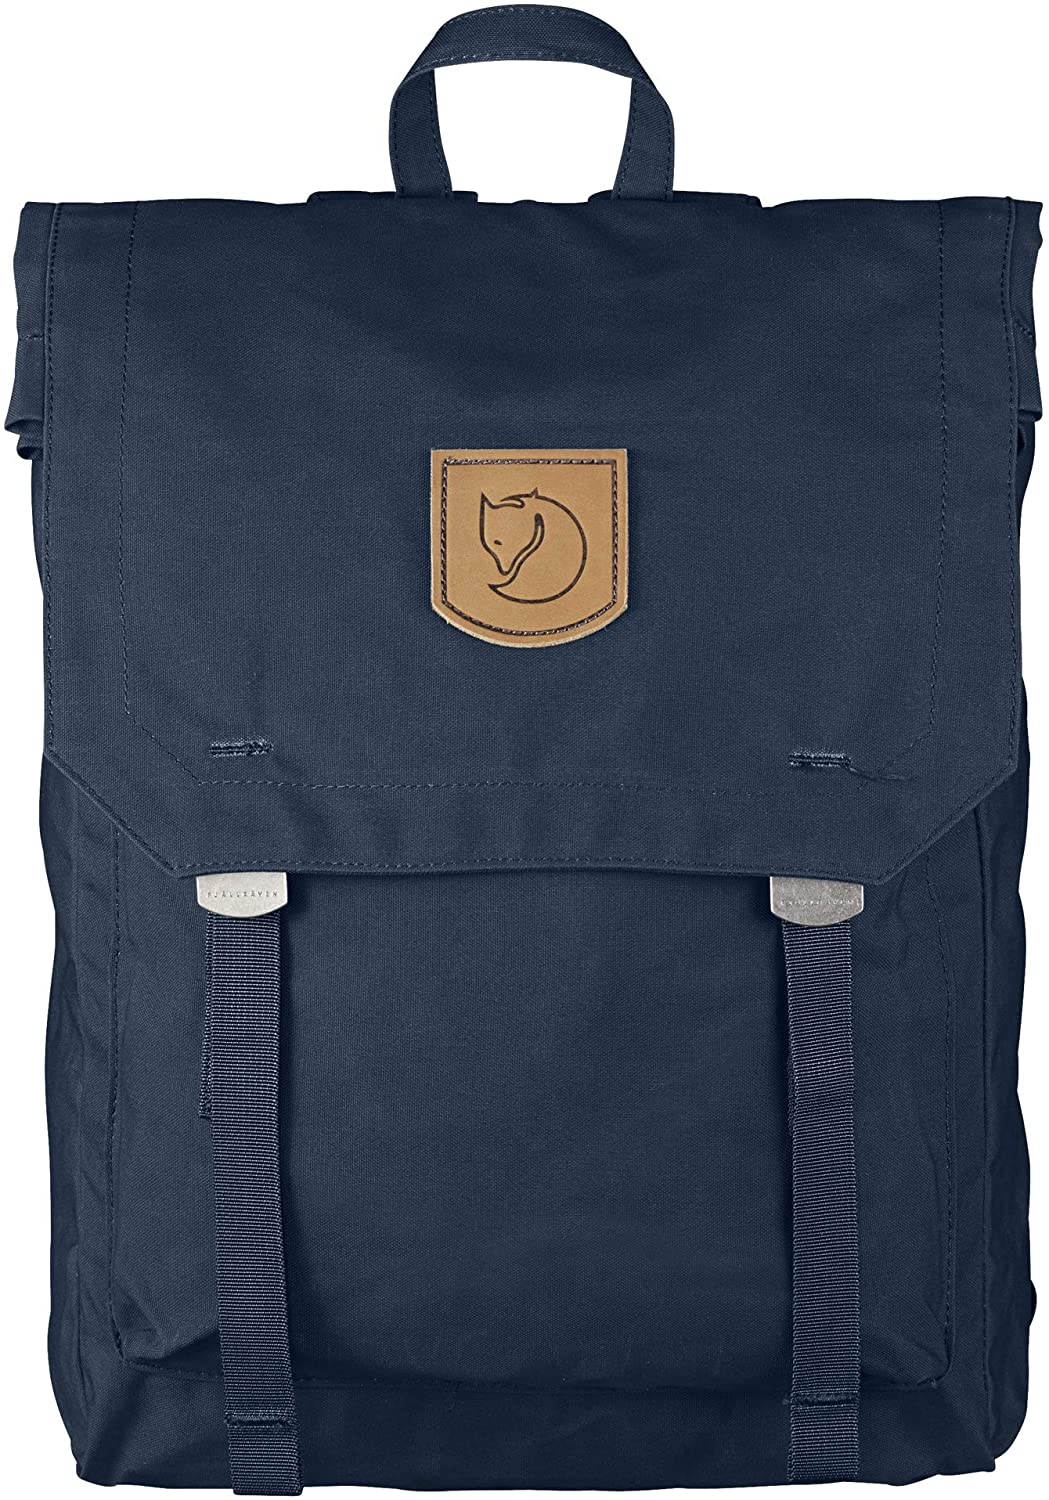

In [10]:
from vertexai.preview.vision_models import Image, ImageTextModel

model = ImageTextModel.from_pretrained("imagetext@001")

# Use either a Google Cloud Storage URI or a local file path.
file_path = "https://storage.googleapis.com/fake-store-bucket/81fPKd-2AYL._AC_SL1500_.jpg"  # @param {type:"string"}

# Load the image file as Image object
cloud_next_image = Image.load_from_file(file_path)
cloud_next_image.show()

In [11]:
# Get a caption from the image.  Default language is English
model.get_captions(
    image=cloud_next_image,
)

['a blue backpack with a fox on the front']

In [15]:
model.get_captions(
    image=cloud_next_image,
    number_of_results=3,
    language="en"
)

['a blue backpack with a fox on the front',
 'a blue bag with a brown fox on it',
 'a blue bag with a brown fox on the front']

## Generating captions in non-English languages

Visual captioning with Imagen on Vertex AI can generate captions in multiple languages as well. To generate a caption in a specific language, you can set the language parameter as one of the values:

* en - English
* fr - French
* de - German
* it - Italian
* es - Spanish

For a list of supported languages, check out the official documentation.

In [13]:
# Get 2 image captions in Spanish
model.get_captions(
    image=cloud_next_image,
    number_of_results=2,
    language="es",
)

['una mochila azul con la letra g en la parte superior',
 'una mochila azul con la letra g en la parte delantera']

In [14]:
# Get an image caption in Italian
model.get_captions(
    image=cloud_next_image,
    number_of_results=3,
    language="it",
)

['uno zaino blu con la lettera g su di esso',
 'un piccolo zaino blu con la lettera g su di esso',
 'uno zaino blu con la lettera g sopra']

##Try it yourself

You can also try using the visual captioning model with images of your choice. If you need to download an image file, you can use the provided auxiliary function download_image.

Feel free to experiment with different images and model parameters to see how the results change.

In [ ]:
import os
import requests


def download_image(url: str) -> str:
    """Downloads an image from the specified URL."""

    # Send a get request to the url
    response = requests.get(url)

    if response.status_code != 200:
        raise Exception(f"Failed to download image from {url}")

    # Define image related variables
    image_path = os.path.basename(url)
    image_bytes = response.content
    image_type = response.headers["Content-Type"]

    # Check for image type, currently only PNG or JPEG format are supported
    if image_type not in {"image/png", "image/jpeg"}:
        raise ValueError("Image can only be in PNG or JPEG format")

    # Write image data to a file
    with open(image_path, "wb") as f:
        f.write(image_bytes)
    return image_path

In [ ]:
# Download an image
url = "https://storage.googleapis.com/fake-store-bucket/51eg55uWmdL._AC_UX679_.jpg"
image_path = download_image(url)

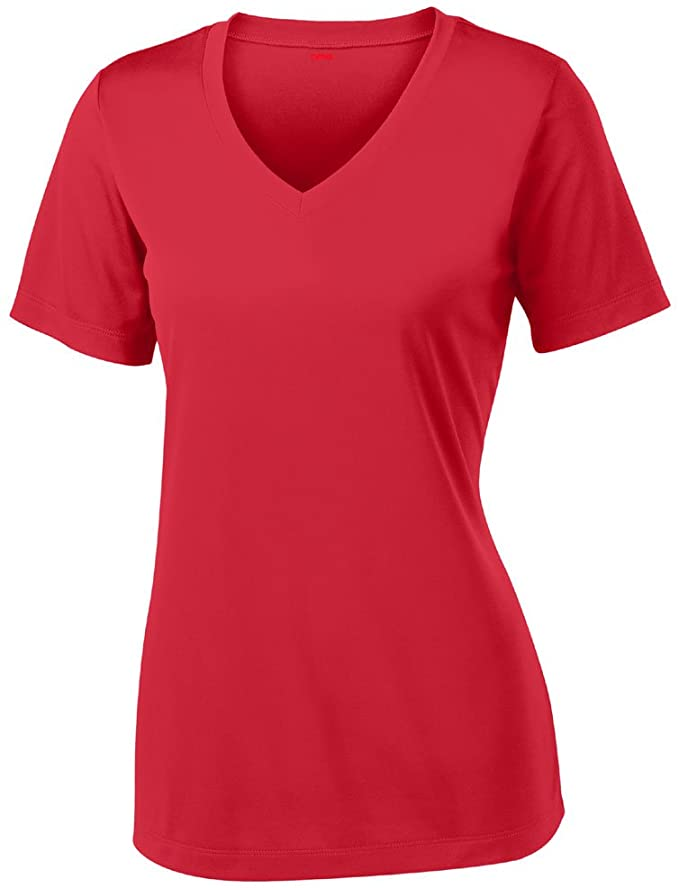

In [ ]:
# Load the newly downloaded image
user_image = Image.load_from_file(image_path)
user_image.show()

In [ ]:
# Generate the visual captions for the image
model.get_captions(
    image=user_image,
    number_of_results=1,
    language="en"
)

['a red t-shirt with a v-neck and short sleeves']